In [ ]:
Breast cancer Prediction using Machine learning Algorithms and Deep learning neural network

In [138]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [139]:
#importing dataset
dataset = pd.read_csv('breast-cancer.csv')
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

In [140]:

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [141]:
print("Cancer data set dimensions : {}".format(dataset.shape))


Cancer data set dimensions : (569, 32)


In [142]:
dataset.isnull().sum()
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [143]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [144]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)
Y_test.shape

(171,)

In [145]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

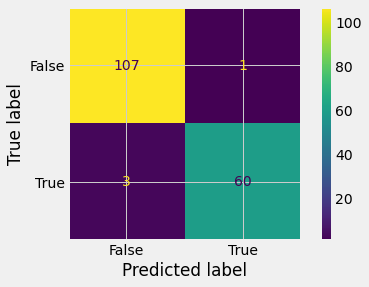

In [147]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [148]:
from sklearn.metrics import accuracy_score
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.9766081871345029


In [149]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

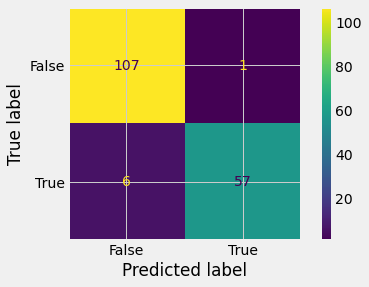

In [150]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [151]:
from sklearn.metrics import accuracy_score
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.9590643274853801


In [152]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

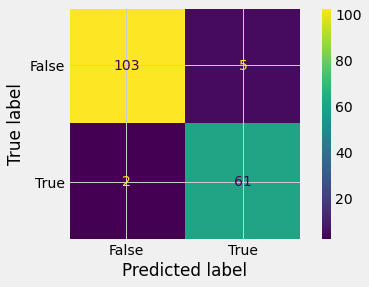

In [153]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [154]:
from sklearn.metrics import accuracy_score
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.9590643274853801


In [155]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

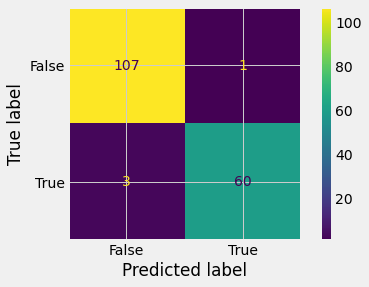

In [156]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [157]:
from sklearn.metrics import accuracy_score
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.9766081871345029


In [158]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

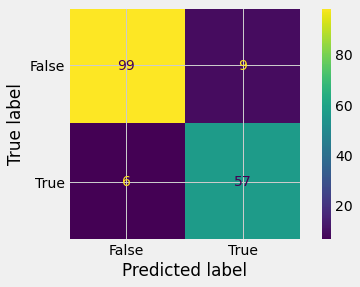

In [159]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [160]:
from sklearn.metrics import accuracy_score
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.9122807017543859


In [161]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

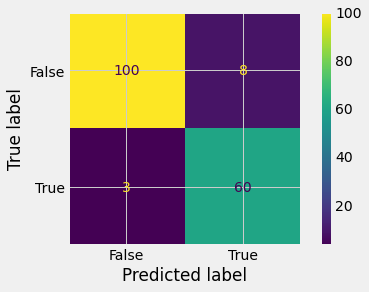

In [162]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [163]:
from sklearn.metrics import accuracy_score
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.935672514619883


In [164]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [165]:
Y_pred = classifier.predict(X_test)

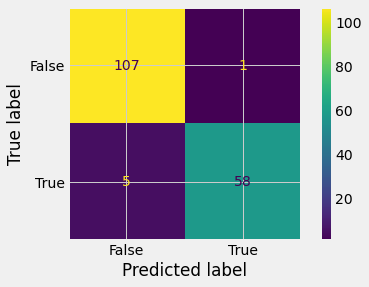

In [166]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()


In [167]:
from sklearn.metrics import accuracy_score
print(f'accuracy score: {accuracy_score(Y_test, Y_pred)}')

accuracy score: 0.9649122807017544


In [168]:
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=30))
model.add(Dropout(0.1))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                496       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [169]:
history = model.fit(X_train, Y_train, epochs=150, validation_split=0.2)

Epoch 1/150
10/10 [==============================] - 1s 23ms/step - loss: 0.7913 - accuracy: 0.4371 - val_loss: 0.6793 - val_accuracy: 0.4250
Epoch 2/150
10/10 [==============================] - 0s 7ms/step - loss: 0.6846 - accuracy: 0.4811 - val_loss: 0.5937 - val_accuracy: 0.5125
Epoch 3/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5925 - accuracy: 0.6509 - val_loss: 0.5258 - val_accuracy: 0.7125
Epoch 4/150
10/10 [==============================] - 0s 7ms/step - loss: 0.5351 - accuracy: 0.7610 - val_loss: 0.4732 - val_accuracy: 0.8250
Epoch 5/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4761 - accuracy: 0.8711 - val_loss: 0.4263 - val_accuracy: 0.9000
Epoch 6/150
10/10 [==============================] - 0s 7ms/step - loss: 0.4442 - accuracy: 0.8742 - val_loss: 0.3818 - val_accuracy: 0.9250
Epoch 7/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3989 - accuracy: 0.9340 - val_loss: 0.3396 - val_accuracy: 0.9375
Epoch 8/150


Epoch 59/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0578 - accuracy: 0.9811 - val_loss: 0.0546 - val_accuracy: 0.9875
Epoch 60/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0548 - accuracy: 0.9874 - val_loss: 0.0544 - val_accuracy: 0.9875
Epoch 61/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0520 - accuracy: 0.9874 - val_loss: 0.0547 - val_accuracy: 0.9875
Epoch 62/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0546 - accuracy: 0.9843 - val_loss: 0.0556 - val_accuracy: 0.9875
Epoch 63/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0571 - accuracy: 0.9874 - val_loss: 0.0545 - val_accuracy: 0.9875
Epoch 64/150
10/10 [==============================] - 0s 7ms/step - loss: 0.0520 - accuracy: 0.9874 - val_loss: 0.0551 - val_accuracy: 0.9875
Epoch 65/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0575 - accuracy: 0.9874 - val_loss: 0.0547 - val_accuracy: 0.9875
Epoch 

10/10 [==============================] - 0s 9ms/step - loss: 0.0287 - accuracy: 0.9906 - val_loss: 0.0442 - val_accuracy: 0.9875
Epoch 117/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0253 - accuracy: 0.9906 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 118/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 119/150
10/10 [==============================] - 0s 7ms/step - loss: 0.0242 - accuracy: 0.9937 - val_loss: 0.0420 - val_accuracy: 0.9875
Epoch 120/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0298 - accuracy: 0.9937 - val_loss: 0.0420 - val_accuracy: 0.9875
Epoch 121/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.0433 - val_accuracy: 0.9875
Epoch 122/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0252 - accuracy: 0.9906 - val_loss: 0.0436 - val_accuracy: 0.9875
Epoch 123/150

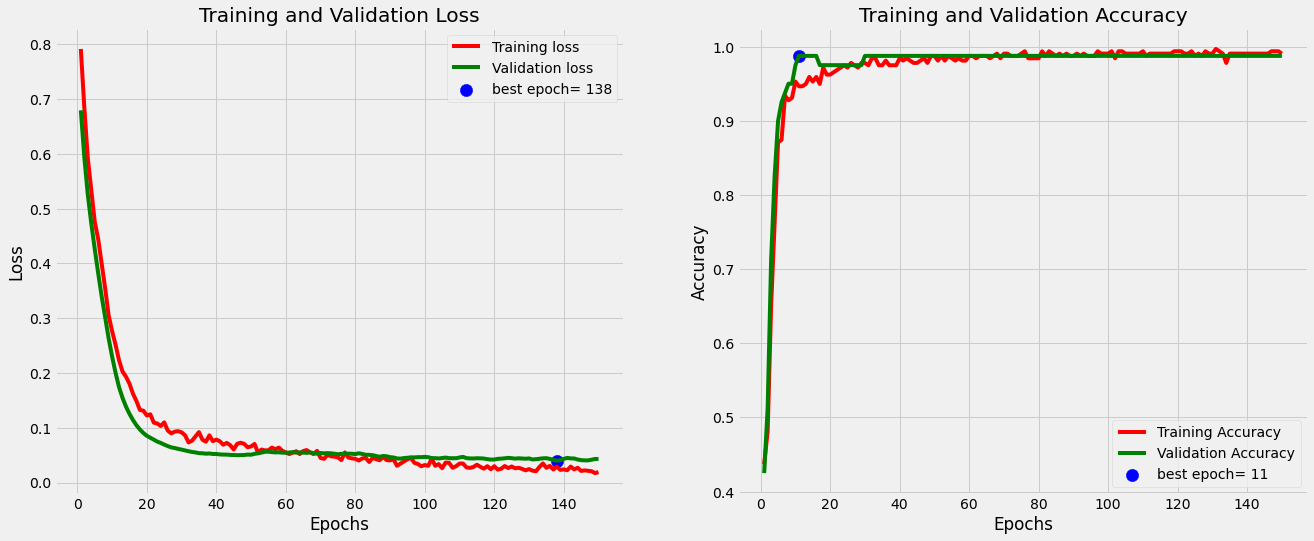

In [170]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
highest_acc = val_acc[index_acc]
Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, train_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , highest_acc, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [176]:
Y_pred = model.predict(X_test)
Y_pred.shape
display(Y_pred)

6/6 [==============================] - 0s 1ms/step


array([[9.9999988e-01],
       [5.4987192e-02],
       [1.4155326e-04],
       [2.4357799e-03],
       [1.5701950e-04],
       [2.3513740e-04],
       [5.3589515e-06],
       [1.4589165e-04],
       [4.6370906e-06],
       [7.7704122e-08],
       [3.3072524e-02],
       [2.8227566e-02],
       [9.3266510e-07],
       [3.3537355e-01],
       [6.3072258e-01],
       [9.9999762e-01],
       [9.5394498e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999976e-01],
       [9.9997079e-01],
       [1.4804490e-03],
       [3.4092204e-04],
       [1.0000000e+00],
       [2.7589081e-04],
       [4.6026062e-06],
       [9.9765551e-01],
       [2.7536100e-04],
       [1.0000000e+00],
       [1.1865251e-05],
       [1.0000000e+00],
       [2.5751743e-02],
       [9.9999982e-01],
       [1.6255516e-08],
       [1.0000000e+00],
       [7.0804036e-03],
       [1.0000000e+00],
       [9.6407312e-04],
       [9.9999994e-01],
       [9.9993914e-01],
       [5.549864